In [1]:

import numpy as np 
import pandas as pd 
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import SGD
from keras import initializers, regularizers, constraints, optimizers, layers
import pickle

import swifter

pd.set_option('max.column', None)
%matplotlib inline

ImportError: No module named 'keras'

In [3]:
print('hello')

hello


In [4]:
for i in [1,3,9]:
    print(i)

1
3
9


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train = train.iloc[0:100]
test = test.iloc[0:100]

In [5]:
y = train['target']
x = train['comment_text']

x_test = test['comment_text']

In [6]:
def remove_punctuation(listOfSentences):
    
    from string import punctuation
    
    output_list = []
    
    for sentence in listOfSentences:
        for punct in punctuation:
            sentence = sentence.replace(punct, '')
        output_list.append(sentence)
    return(output_list)

In [7]:
cleanPunctTrain = remove_punctuation(x)
cleanPunctTest = remove_punctuation(x_test)

In [8]:
def removeStopWords(listOfSentences):
    from nltk.corpus import stopwords
    
    output_list = []
    
    for sentence in listOfSentences:
        output_list.append(' '.join(word for word in sentence.split() if word not in stopwords.words()))
    
    return(output_list)
    

In [9]:
minusStopWordsTrain = removeStopWords(cleanPunctTrain)
minusStopWordsTest = removeStopWords(cleanPunctTest)

In [10]:
def stemWords(listOfSentences):
    
    from nltk.stem import PorterStemmer 
    ps = PorterStemmer() 
    
    output_list = []
    

    for sentence in listOfSentences:
        output_list.append(' '.join(ps.stem(word) for word in sentence.split()))
        
    return(output_list)

In [11]:
stemmedTrain = stemWords(minusStopWordsTrain)
stemmedTest = stemWords(minusStopWordsTest)

convert words to numbers by tokenizing then assigning numbers to each word

In [13]:
myTokenizer = Tokenizer()

myTokenizer.fit_on_texts(cleanPunctTrain)


tokenized_train = myTokenizer.texts_to_sequences(cleanPunctTrain)
tokenized_test = myTokenizer.texts_to_sequences(cleanPunctTest)

each word is encoded by a number

In [14]:
myTokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'and': 4,
 'of': 5,
 'i': 6,
 'is': 7,
 'that': 8,
 'in': 9,
 'on': 10,
 'this': 11,
 'for': 12,
 'you': 13,
 'be': 14,
 'it': 15,
 'comments': 16,
 'are': 17,
 'have': 18,
 'with': 19,
 'but': 20,
 'we': 21,
 'more': 22,
 'or': 23,
 'their': 24,
 'as': 25,
 'civil': 26,
 'so': 27,
 'if': 28,
 'its': 29,
 'not': 30,
 'they': 31,
 'other': 32,
 'will': 33,
 'comment': 34,
 'who': 35,
 'people': 36,
 'like': 37,
 'by': 38,
 'one': 39,
 'all': 40,
 'up': 41,
 'do': 42,
 'system': 43,
 'would': 44,
 'my': 45,
 'an': 46,
 'at': 47,
 'them': 48,
 'im': 49,
 'there': 50,
 'has': 51,
 'what': 52,
 'your': 53,
 'was': 54,
 'out': 55,
 'from': 56,
 'just': 57,
 'want': 58,
 'great': 59,
 'well': 60,
 'dont': 61,
 'very': 62,
 'no': 63,
 'being': 64,
 'only': 65,
 'new': 66,
 'read': 67,
 'think': 68,
 'any': 69,
 'than': 70,
 'about': 71,
 'see': 72,
 'thats': 73,
 'make': 74,
 'when': 75,
 'good': 76,
 'which': 77,
 'even': 78,
 'here': 79,
 'some': 80,
 'try': 81

all comments are now encoded as a list of numbers, however, many of these lists will be of different lengths so they require padding. This is where shorter sentences are padded with zeros and shorter comments shortened. In order to identify a suitable length for all comments we can look at the distribution of comment lengths

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


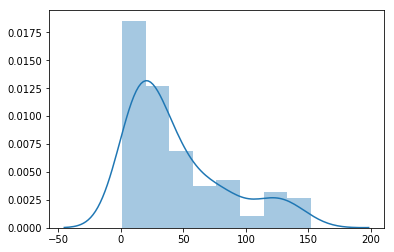

In [15]:
commentLengths = [len(c) for c in tokenized_train]
sns.distplot(commentLengths)

I choose the comment length of 200

In [16]:
comment_length = 200
tokenized_train_padded = pad_sequences(tokenized_train, maxlen=comment_length)
tokenized_test_padded = pad_sequences(tokenized_test, maxlen=comment_length)

I define embedding size and vocabulary size

In [17]:
embed_size = 128
uniqueWordCount = max(myTokenizer.word_index.values())+1


I outline the neural network architechture

In [18]:
model = Sequential()
#I add a an embedding layer of which the output is length 128
model.add(Embedding(uniqueWordCount, embed_size))
#I add a long short-term memory layer of output size 60
model.add(LSTM(50, return_sequences=True,name='lstm_layer'))
#dimensionality of tensor is reduced from 3 to 2
model.add(GlobalMaxPool1D())
#dropout layer regularises so model more generalisable
model.add(Dropout(0.2))
#dense layer, I don't know why
model.add(Dense(45, activation="relu"))
#another dropout layer
model.add(Dropout(0.3))
#dense layer with sigmoid function for binary classification
model.add(Dense(1, activation="sigmoid"))




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


I compile and fit the model

In [19]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'] )

history = model.fit(tokenized_train_padded, y, batch_size=20, epochs=3, validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 70 samples, validate on 30 samples
Epoch 1/3
70/70 [==============================] - 2s 23ms/step - loss: 0.6813 - acc: 0.6571 - val_loss: 0.6554 - val_acc: 0.8000
Epoch 2/3
70/70 [==============================] - 1s 9ms/step - loss: 0.6458 - acc: 0.7571 - val_loss: 0.6121 - val_acc: 0.8000
Epoch 3/3
70/70 [==============================] - 1s 10ms/step - loss: 0.6023 - acc: 0.7571 - val_loss: 0.5482 - val_acc: 0.8000


metrics for all epochs

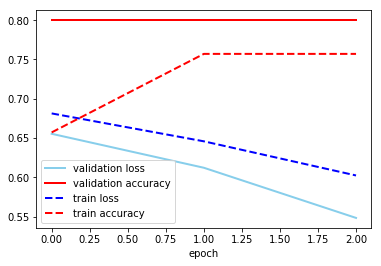

In [20]:
history_df = pd.DataFrame(history.history)
history_df.reset_index(drop = False, inplace=True)

# multiple line plot
plt.plot( 'index', 'val_loss', data=history_df, marker='', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label ='validation loss')
plt.plot( 'index', 'val_acc', data=history_df, marker='', color='red', linewidth=2, label = 'validation accuracy')
plt.plot( 'index', 'loss', data=history_df, marker='', color='blue', linewidth=2, linestyle='dashed', label="train loss")
plt.plot( 'index', 'acc', data=history_df, marker='', color='red', linewidth=2, linestyle='dashed', label="train accuracy")
plt.xlabel('epoch')
plt.legend()



predictions of test data

In [21]:
predictions = model.predict(tokenized_test_padded)

In [32]:
def remove_punctuation(sentence):
    
    from string import punctuation
    
    for punct in punctuation:
        sentence = sentence.replace(punct, '')

    return(sentence)




#function removes stop words from a sentence
def removeStopWords(sentence):
    from nltk.corpus import stopwords
    import nltk
    
    return(' '.join(word for word in sentence.split() if word not in stopwords.words()))
    
    


#function stems words according to Porter stemmer rules
def stemWords(sentence):
    
    from nltk.stem import PorterStemmer 
    ps = PorterStemmer() 
    
    return(' '.join(ps.stem(word) for word in sentence.split()))

In [53]:
test_comment = 'hello there!, how are you on this fine day'

#remove punctuation
punc_removed = remove_punctuation(test_comment)
#remove stop words
stops_removed = removeStopWords(punc_removed)
#stem words
stemmed = stemWords(stops_removed)

AttributeError: 'Series' object has no attribute 'split'

In [61]:
myTokenizer.word_index['fine']

1187

In [63]:
tokenized_comm = myTokenizer.texts_to_sequences([stemmed])
tokenized_padded_comm = pad_sequences(tokenized_comm, maxlen=comment_length)

In [46]:
tokenized_padded_comm

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 972],
       [  0,   0,   0, ...,   0,   0,   3],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [43]:
tokenized_padded_comm.shape

(14, 200)

In [68]:
model.predict(tokenized_padded_comm)[0][0]

0.41996166

In [70]:
pickle.dump(model, open('NLPmodel.sav', 'wb'))

In [71]:
pickle.dump(myTokenizer, open('NLPtokenizer.sav', 'wb'))

In [72]:
loaded_model = pickle.load(open('NLPmodel.sav', 'rb'))

In [73]:
loaded_model.predict(tokenized_padded_comm)[0][0]

0.41996166

In [22]:
predsSeries = pd.Series(predictions.T[0])

In [23]:
submission = pd.concat([test['id'], pd.DataFrame(predsSeries, columns = ['predictions'])], axis = 1)

In [24]:
def turnToBinary(row):
    if row['predictions'] > 0.5:
        return(1)
    else:
        return(0)

In [25]:
submission['predictions'] = submission.swifter.apply(turnToBinary, axis = 1)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         182400    
_________________________________________________________________
lstm_layer (LSTM)            (None, None, 50)          35800     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                2295      
_________________________________________________________________
dropout_2 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 46        
Total para